# 1 Synchronic word embedding

In [1]:
import os
import json
import nltk
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import brown
from nltk.corpus import words
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors
from gensim.models import keyedvectors

## Step 2

In [2]:
RG65 = {
    "asylum", "gem", "autograph", "glass", "boy", "graveyard", "brother", "grin", "car", "mound", "coast", "noon", "cock",
    "oracle", "cord", "slave", "crane", "tool", "cushion", "voyage", "food", "wizard", "furnace", "woodland", "automobile", "midday",
    "bird", "monk", "cemetery", "pillow", "forest", "rooster", "fruit", "sage", "hill", "serf", "implement", "shore",
    "jewel", "signature", "journey", "smile", "lad", "stove", "madhouse", "string", "magician", "tumbler",
}

In [3]:
word2vec_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
# print(word2vec_model['dog'])
rg65_word2vec = {word:word2vec_model[word] for word in RG65}

## Step 3

In [4]:
TABLE1 = [['cord', 'smile', 0.02],
          ['rooster', 'voyage', 0.04],
          ['noon', 'string', 0.04],
          ['fruit', 'furnace', 0.05],
          ['autograph', 'shore', 0.06],
          ['automobile', 'wizard', 0.11],
          ['mound', 'stove', 0.14],
          ['grin', 'implement', 0.18],
          ['asylum', 'fruit', 0.19],
          ['asylum', 'monk', 0.39],
          ['graveyard', 'madhouse', 0.42],
          ['glass', 'magician', 0.44],
          ['boy', 'rooster', 0.44],
          ['cushion', 'jewel', 0.45],
          ['monk', 'slave', 0.57],
          ['asylum', 'cemetery', 0.79],
          ['coast', 'forest', 0.85],
          ['grin', 'lad', 0.88],
          ['shore', 'woodland', 0.90],
          ['monk', 'oracle', 0.91],
          ['boy', 'sage', 0.96],
          ['automobile', 'cushion', 0.97],
          ['mound', 'shore', 0.97],
          ['lad', 'wizard', 0.99],
          ['forest', 'graveyard', 1.00],
          ['food', 'rooster', 1.09],
          ['cemetery', 'woodland', 1.18],
          ['shore', 'voyage', 1.22],
          ['bird', 'woodland', 1.24],
          ['coast', 'hill', 1.26],
          ['furnace', 'implement', 1.37],
          ['crane', 'rooster', 1.41],
          ['hill', 'woodland', 1.48],
          ['car', 'journey', 1.55],
          ['cemetery', 'mound', 1.69],
          ['glass', 'jewel', 1.78],
          ['magician', 'oracle', 1.82],
          ['crane', 'implement', 2.37],
          ['brother', 'lad', 2.41],
          ['sage', 'wizard', 2.46],
          ['oracle', 'sage', 2.61],
          ['bird', 'crane', 2.63],
          ['bird', 'cock', 2.63],
          ['food', 'fruit', 2.69],
          ['brother', 'monk', 2.74],
          ['asylum', 'madhouse', 3.04],
          ['furnace', 'stove', 3.11],
          ['magician', 'wizard', 3.21],
          ['hill', 'mound', 3.29],
          ['cord', 'string', 3.41],
          ['glass', 'tumbler', 3.45],
          ['grin', 'smile', 3.46],
          ['serf', 'slave', 3.46],
          ['journey', 'voyage', 3.58],
          ['autograph', 'signature', 3.59],
          ['coast', 'shore', 3.60],
          ['forest', 'woodland', 3.65],
          ['implement', 'tool', 3.66],
          ['cock', 'rooster', 3.68],
          ['boy', 'lad', 3.82],
          ['cushion', 'pillow', 3.84],
          ['cemetery', 'graveyard', 3.88],
          ['automobile', 'car', 3.92],
          ['midday', 'noon', 3.94],
          ['gem', 'jewel', 3.94]]

In [5]:
def get_scores(rg65_word2vec):
    human_score = np.empty(len(TABLE1))
    word2vec_cosine_sim_score = np.empty(len(TABLE1))
    word2vec_cosine_distance_score = np.empty(len(TABLE1))
        
    for i, entry in enumerate(TABLE1):
        word1 = entry[0]
        word2 = entry[1]
        word1_embedding = rg65_word2vec[word1]
        word2_embedding = rg65_word2vec[word2]

        word2vec_cosine_sim_score[i] = cosine_similarity(word1_embedding.reshape(1, -1), word2_embedding.reshape(1, -1))[0][0]
        word2vec_cosine_distance_score[i] = cosine(word1_embedding, word2_embedding)
        human_score[i] = entry[2]
    
    return human_score, word2vec_cosine_sim_score, word2vec_cosine_distance_score


In [6]:
human_score, word2vec_cosine_similarity_score, word2vec_cosine_distance_score = get_scores(rg65_word2vec)
word2vec_pearson_correlation = pearsonr(word2vec_cosine_similarity_score, human_score)
print("word2vec_pearson_correlation: %f, p-value: %f" % word2vec_pearson_correlation)

word2vec_pearson_correlation: 0.772062, p-value: 0.000000


### From Earlier Exercise:

M1_pearson_correlation: 0.175690 <br>
M1_plus_pearson_correlation: 0.269409 <br>
M2_10_pearson_correlation: 0.229269 <br>
M2_100_pearson_correlation: 0.307759 <br>
M2_300_pearson_correlation: 0.281077 <br>

### Therefore, the pearson correlation between word2vec-based and human-based similarity is higher than those from LSA and word-context vectors from analyses in the earlier exercise. This indicates word2vec-based word vector has better performance.
<br>
<br>

## Step 4

In [7]:
SEMANTIC_ANALOGY_TEST_NAMES = {
    "capital-common-countries",
    "capital-world",
    "currency",
    "city-in-state",
    "family",
    
}

SYNTACTIC_ANALOGY_TEST_NAMES = {
    "gram1-adjective-to-adverb",
    "gram2-opposite",
    "gram3-comparative",
    "gram4-superlative",
    "gram5-present-participle",
    "gram6-nationality-adjective",
    "gram7-past-tense",
    "gram8-plural",
    "gram9-plural-verbs",
}


def prepare_analogy_test(lsa_word_set, word2vec_word_set):
    semantic_analogy_test = []
    syntactic_analogy_test = []
    
    analogy_test = None
    with open("analogy_test_data.txt") as f:
        content = f.readlines()
        for line in content:
            test_data = line.split()
            if ":" == test_data[0]:
                analogy_test = semantic_analogy_test if test_data[1] in SEMANTIC_ANALOGY_TEST_NAMES else syntactic_analogy_test
                analogy_test.append(line)
            else:
                is_included_in_lsa = all(word in lsa_word_set for word in test_data)
                is_included_in_word2vec = all(word in word2vec_word_set for word in test_data)
                if is_included_in_lsa and is_included_in_word2vec:
                    analogy_test.append(line)
    
    with open("semantic_analogy_test.txt", "w") as f:
        f.write("".join(semantic_analogy_test))
    with open("syntactic_analogy_test.txt", "w") as f:
        f.write("".join(syntactic_analogy_test))


def get_lsa_dim300_word_dict():
    with open("lsa_300dim_vec.json") as json_file:
        data = json.load(json_file)
#     rg65_lsa_dim300_word_vec = {word:data[word] for word in RG65}
    return data


In [8]:
lsa_dim300_word_dict = get_lsa_dim300_word_dict()
lsa_word_set = set(lsa_dim300_word_dict.keys())
word2vec_word_set = set(word2vec_model.vocab.keys())
prepare_analogy_test(lsa_word_set, word2vec_word_set)

In [9]:
word2vec_semantic_analogy_scores = word2vec_model.evaluate_word_analogies('semantic_analogy_test.txt')
print("semantic analogy accuracy of word2vec: %f" % word2vec_semantic_analogy_scores[0])
word2vec_syntactic_analogy_scores = word2vec_model.evaluate_word_analogies('syntactic_analogy_test.txt')
print("syntactic analogy accuracy of word2vec: %f" % word2vec_syntactic_analogy_scores[0])

semantic analogy accuracy of word2vec: 0.865546
syntactic analogy accuracy of word2vec: 0.708707


In [10]:
lsa_model = KeyedVectors(vector_size=300)
lsa_model.add(entities=list(lsa_dim300_word_dict.keys()), weights=np.array(list(lsa_dim300_word_dict.values())))

lsa_semantic_analogy_scores = lsa_model.evaluate_word_analogies('semantic_analogy_test.txt')
print("semantic analogy accuracy of lsa: %f" % lsa_semantic_analogy_scores[0])
lsa_syntactic_analogy_scores = lsa_model.evaluate_word_analogies('syntactic_analogy_test.txt')
print("syntactic analogy accuracy of lsa: %f" % lsa_syntactic_analogy_scores[0])

semantic analogy accuracy of lsa: 0.126050
syntactic analogy accuracy of lsa: 0.084960


### Conclusion: word2vec based embedding has higher accuracy than the LSA based embedding on both semantic analogy and syntactic analogy test. This indicates word2vec vector has better performance than LSA vector.

## Step 5

From the paper [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf), we see larger training data and larger embedding vector size can both increase the accuracy of semantic/syntactic word relationship test. <br>

Therefore, in our case, there are two approaches to improve the existing set of vector-based models in capturing word similarities. <br>
(1) When training the word embedding vector, we can increase the training data size to 600 billion words from 100 billion words. Because larger training data provides more word usage context and word relations for the model to learn, the model can generate higher quality embeddings, which increase the performance in word analogy test. <br>
(2) When training the word embedding vector, we can also increase the dimension of the embedding vector to 600 from 300. Larger dimension gives word vector more space to store the semantic/syntactic information about the word, which can increase the performance in word analogy test.

However, increasing the size of training dataset and embedding vector can both introduce more computational cost. Higher dimensional embedding vector also consumes more memory and might have low performance when there is no enough training data.

# 2 Diachronic word embedding

## Step 1

In [11]:
import pickle

def load_part2_data():
    with open("part2_data/data.pkl", 'rb') as f:
        return pickle.load(f)

In [12]:
part2_data = load_part2_data()
# part2_data['d']

## Step 2

Three different methods for measuring degree of semantic change: <br>
(1) [Euclidean Distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html#scipy.spatial.distance.euclidean)  <br>
(2) [Cosine Distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine)  <br>
(3) [Correlation Distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.correlation.html#scipy.spatial.distance.correlation) <br>

Procedure: <br>
For each word, we compute the distance between the word embedding vector at the first and last time point. Larger distance means higher degree of semantic change.

In [13]:
from scipy.spatial.distance import euclidean, cosine, correlation

def compute_total_distance_change(distance_measurer, data):
    num_words = len(data)
    num_time_points = len(data[0])
    total_distance_diff = np.empty(num_words)
    
    for i in range(num_words):
        total_distance_diff[i] = distance_measurer(data[i][0], data[i][-1])
    
    total_distance_diff = np.nan_to_num(total_distance_diff)
    return total_distance_diff

def get_most_and_least_changing_word_index(distance_diff, topK=20):
    least_to_most_changing_word_index = distance_diff.argsort()
    least_changing_word_index = least_to_most_changing_word_index[:topK]
    most_changing_word_index = np.flip(least_to_most_changing_word_index[-topK:])
    return least_changing_word_index, most_changing_word_index


In [14]:
euclidean_distance_change = compute_total_distance_change(euclidean, part2_data['E'])
euclidean_least_changing_word_idx_step2, euclidean_most_changing_word_idx_step2 = get_most_and_least_changing_word_index(euclidean_distance_change, topK=20)

cosine_distance_change = compute_total_distance_change(cosine, part2_data['E'])
cosine_least_changing_word_idx_step2, cosine_most_changing_word_idx_step2 = get_most_and_least_changing_word_index(cosine_distance_change, topK=20)

correlation_distance_change = compute_total_distance_change(correlation, part2_data['E'])
correlation_least_changing_word_idx_step2, correlation_most_changing_word_idx_step2 = get_most_and_least_changing_word_index(correlation_distance_change, topK=20)

In [15]:
word_list = np.array(part2_data['w'])
print("least changing word by using euclidean distance:\n ", word_list[euclidean_least_changing_word_idx_step2])  
print("most changing word by using euclidean distance:\n ", word_list[euclidean_most_changing_word_idx_step2], "\n")  
print("least changing word by using cosine distance:\n ", word_list[cosine_least_changing_word_idx_step2])  
print("most changing word by using cosine distance:\n ", word_list[cosine_most_changing_word_idx_step2], "\n")  
print("least changing word by using correlation distance:\n ", word_list[correlation_least_changing_word_idx_step2])  
print("most changing word by using correlation distance:\n ", word_list[correlation_most_changing_word_idx_step2], "\n")  

least changing word by using euclidean distance:
  ['april' 'june' 'november' 'february' 'years' 'october' 'increase'
 'january' 'century' 'months' 'daughter' 'december' 'god' 'september'
 'feet' 'week' 'evening' 'door' 'payment' 'miles']
most changing word by using euclidean distance:
  ['programs' 'objectives' 'computer' 'radio' 'sector' 'goals' 'approach'
 'van' 'shri' 'media' 'impact' 'perspective' 'patterns' 'berkeley' 'shift'
 'film' 'assessment' 'stanford' 'challenge' 'therapy'] 

least changing word by using cosine distance:
  ['mcgraw' 'skills' 'ml' 'techniques' 'april' 'june' 'november' 'february'
 'years' 'october' 'increase' 'january' 'century' 'months' 'daughter'
 'december' 'god' 'september' 'feet' 'week']
most changing word by using cosine distance:
  ['programs' 'objectives' 'computer' 'radio' 'sector' 'goals' 'approach'
 'van' 'shri' 'media' 'impact' 'perspective' 'patterns' 'berkeley' 'shift'
 'film' 'assessment' 'stanford' 'challenge' 'therapy'] 

least changing word

In [16]:
changing_scores = [euclidean_distance_change, cosine_distance_change, correlation_distance_change]
pearsonr_relation_summary = np.empty((len(changing_scores), len(changing_scores)))
for i, changing_score_X in enumerate(changing_scores):
    for j, changing_score_Y in enumerate(changing_scores):
        pearsonr_relation_summary[i][j] = pearsonr(changing_score_X, changing_score_Y)[0]
    
print(pearsonr_relation_summary)
print(pearsonr_relation_summary.sum(axis=1))

[[1.         0.96494804 0.96468057]
 [0.96494804 1.         0.9996484 ]
 [0.96468057 0.9996484  1.        ]]
[2.92962861 2.96459644 2.96432897]


### Therefore, the cosine distance based approach has the most positive correlation with other approaches, and the euclidean distance based approach has the least positive correlation with other approaches.

## Step 3

__Proposed Procedure:__ <br>
We let the word embedding vector at the first time point as the base vector. We then compute the distance between this base vector and the vectors at later time points. This gives us a distance-vector where the i th point is the distance between word embedding in i th time point and first time point. Finally, we compute the standard deviation of all distance values, and higher standard deviation indicates a more changing word. <br>
<br>
__Justification:__ <br>
The step 2 used the word embedding distance between the first and last time point to represent the degree of semantic change, which can cause false negative. For example, if a word changes its meaning in the middle, then back to its original meaning in the end, the method in step 2 is unable to detect the semantic change. The proposed procedure in step 3 is used to address this issue since it takes all time points into account, instead of only the first and last time point. In addition, the standard deviation gives higher score to a sudden change of embedding vector. A sudden distance change of the embedding vector is likely to be a semantic change.


In [17]:
def compute_change_over_time(distance_measurer, data):
    num_words = len(data)
    num_time_points = len(data[0])
    distance_vector = np.empty((num_words, num_time_points))
    
    for i in range(num_words):
        base_vector = data[i][0]
        for j in range(num_time_points):
            distance = distance_measurer(base_vector, data[i][j])
            distance_vector[i][j] = distance
    
    distance_vector = np.nan_to_num(distance_vector)
    std_across_time = distance_vector.std(axis=1)
    return std_across_time, distance_vector


In [18]:
euclidean_std_score, euclidean_distance_vector = compute_change_over_time(euclidean, part2_data['E'])
cosine_std_score, cosine_distance_vector = compute_change_over_time(cosine, part2_data['E'])
correlation_std_score, correlation_distance_vector = compute_change_over_time(correlation, part2_data['E'])

In [19]:
euclidean_least_changing_word_idx_step3, euclidean_most_changing_word_idx_step3 = get_most_and_least_changing_word_index(euclidean_std_score, topK=20)
cosine_least_changing_word_idx_step3, cosine_most_changing_word_idx_step3 = get_most_and_least_changing_word_index(cosine_std_score, topK=20)
correlation_least_changing_word_idx_step3, correlation_most_changing_word_idx_step3 = get_most_and_least_changing_word_index(correlation_std_score, topK=20)

# print("least changing word by using euclidean distance:\n ", word_list[euclidean_least_changing_word_idx_step3])  
# print("most changing word by using euclidean distance:\n ", word_list[euclidean_most_changing_word_idx_step3], "\n")  
# print("least changing word by using cosine distance:\n ", word_list[cosine_least_changing_word_idx_step3])  
# print("most changing word by using cosine distance:\n ", word_list[cosine_most_changing_word_idx_step3], "\n")  
# print("least changing word by using correlation distance:\n ", word_list[correlation_least_changing_word_idx_step3])  
# print("most changing word by using correlation distance:\n ", word_list[correlation_most_changing_word_idx_step3], "\n")  

In [20]:
print("pearsonr relation for euclidean distance: %f" % pearsonr(euclidean_std_score, euclidean_distance_change)[0])
print("pearsonr relation for cosine distance: %f" % pearsonr(cosine_std_score, cosine_distance_change)[0])
print("pearsonr relation for correlation distance: %f" % pearsonr(correlation_std_score, correlation_distance_change)[0])

pearsonr relation for euclidean distance: 0.932139
pearsonr relation for cosine distance: 0.947249
pearsonr relation for correlation distance: 0.947096


### Therefore, the cosine distance based method is the most accurate method.

## Step 4

__Setup:__ <br>
We reuse the setup from step 3: "We let the word embedding vector at the first time point as the base vector. We then compute the distance between this base vector and the vectors at later time points. This gives us a distance-vector where the value of i th point is the distance between word embedding in i th time point and first time point."<br>

First, in order to have a change point, the word should have large enough degree of semantic change. It means if a word has a change point, its standard deviation score (the metric from step 3) should be larger than a threshold. Secondly, as we only have 10 points, I assume there can be at most 1 change point. Since we set the first point as the base point, the first point cannot be the change point. In addition, all the values in our distance-vector are computed with respect to the first point, so the value of the first point is always 0, and therefore, the value difference between the first point and second point is always relatively large. Thus, unless the difference between the first point and the second point is larger than a threshold, I will not consider the second point as a change point. <br>

__High level description for the proposed method:__ <br>
The intuition is that the change point usually causes a sudden distance change in the word embedding vector (with respect to the original vector). That means, if the i th time point is a change point, in our distance-vector, the value difference between i th and i-1 th point should be larger than the value difference between other adjacent time points. So our goal is to find a point (from our distance-vector) that has the largest value difference with the preceding point. Moreover, the value difference should be large enough so that the point can be considered as a change point. <br> 
(Side note: I didn't use mean shift, mentioned in [Statistically Significant Detection of Linguistic Change](https://dl.acm.org/doi/pdf/10.1145/2736277.2741627?download=true), because we only have 10 points and didn't do normalization across all words.) <br>

__See the below code for detailed implementation:__ <br>

In [21]:
DIFF_THRESHOLD = 0.07
SECOND_POINT_THRESHOLD_SCALE = 50

def change_point_detection(top_varying_word_points, std_score_threshold):
    change_points = np.empty(len(top_varying_word_points), dtype=int)
    
    for idx, word_points in enumerate(top_varying_word_points):
        if (np.std(word_points) < std_score_threshold):
            change_points[idx] = -1
            continue
        
        change_point = -1
        largest_diff = DIFF_THRESHOLD
        
        for i in range(2, 10):
            diff = np.abs(word_points[i] - word_points[i-1])
            if diff > largest_diff:
                change_point = i
                largest_diff = diff
        
        if np.abs(word_points[1] - word_points[0]) > largest_diff * SECOND_POINT_THRESHOLD_SCALE:
            change_point = 1
        
        change_points[idx] = change_point
        
    return change_points

In [22]:
std_score_threshold = np.average(cosine_std_score)
step2_top_words = word_list[cosine_most_changing_word_idx_step2[:3]]    
step2_top_word_changing_value = cosine_distance_vector[cosine_most_changing_word_idx_step2[:3]]   
change_points_from_step2 = change_point_detection(step2_top_word_changing_value, std_score_threshold)
step3_top_words = word_list[cosine_most_changing_word_idx_step3[:3]]    
step3_top_word_changing_value = cosine_distance_vector[cosine_most_changing_word_idx_step3[:3]]   
change_points_from_step3 = change_point_detection(step3_top_word_changing_value, std_score_threshold)

In [23]:
print("top 3 changing words from step 2: ", step2_top_words)
print("top 3 changing words from step 3: ", step3_top_words)

top 3 changing words from step 2:  ['programs' 'objectives' 'computer']
top 3 changing words from step 3:  ['computer' 'shri' 'objectives']


In [24]:
import matplotlib.pyplot as plt

def draw(word, distance_across_time, change_point_idx):
    time_stamps = [str(10 * i + 1900) for i in range(10)]

    plt.plot(time_stamps, distance_across_time)
    plt.xlabel("Decades")
    plt.ylabel("Distance w.r.t. First Point")
    plt.title("Distance Across Time for '%s'" % word)
    plt.grid(True, axis='y')

    if change_point_idx != -1:
        change_point_value = distance_across_time[change_point_idx]
        plt.plot([change_point_idx], [change_point_value], marker='o', markersize=7, color="red")
    else:
        plt.text(0.5, 0.75, "No Change Point", fontsize=12, color="red")

    plt.show()
    

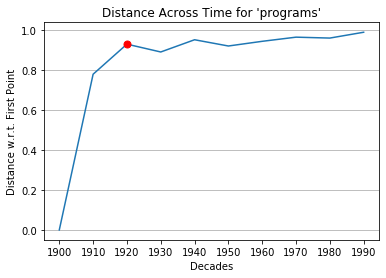

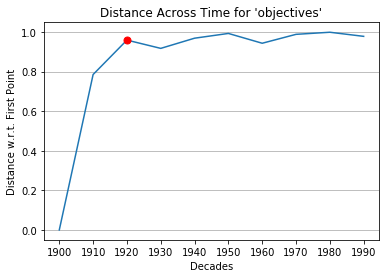

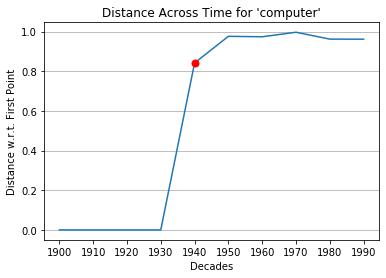

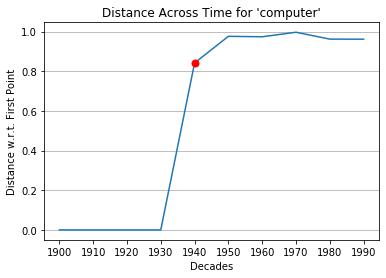

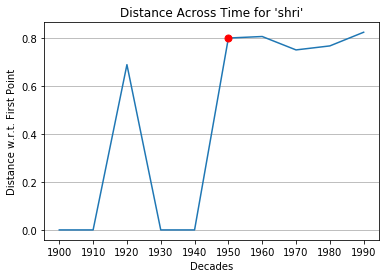

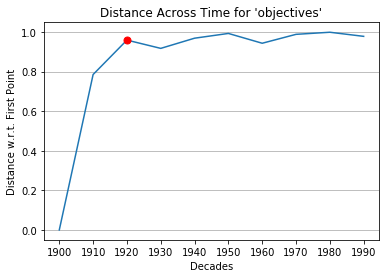

In [25]:
top_words = [*step2_top_words, *step3_top_words]
top_word_changing_value = [*step2_top_word_changing_value, *step3_top_word_changing_value]
change_points = [*change_points_from_step2, *change_points_from_step3]
for i in range(len(top_words)):
    word = top_words[i]
    word_changing_value = top_word_changing_value[i]
    chang_point = change_points[i]
    draw(word, word_changing_value, chang_point) 